# Week 1 Visualization & Correlation -- Mira Shi

In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

### Load Data Sets (TBU)

In [6]:
DATA_PATH = Path("../data/chicago_energy_benchmarking")
MAX_BUILDINGS = 10
all_dfs = []
for file in os.listdir(DATA_PATH):
    if file.endswith(".csv"):
        energy_df = pd.read_csv(DATA_PATH / file)
        year = [int(s) for s in file.split("_") if s.isdigit()][0]
        energy_df["File_Year"] = year
        all_dfs.append(energy_df)
        print(f"Loaded {file} with shape {energy_df.shape}")

combined_df = pd.concat(all_dfs, ignore_index=True)
print(f"Combined dataset shape: {combined_df.shape}")
print(f"Years included: {combined_df['File_Year'].unique()}")

Loaded Chicago_Energy_Benchmarking_-_2017_Data_Reported_in_2018_20251002.csv with shape (2797, 26)
Loaded Chicago_Energy_Benchmarking_-_2015_Data_Reported_in_2016_20251002.csv with shape (1521, 26)
Loaded Chicago_Energy_Benchmarking_-_2019_Data_Reported_in_2020_20251002.csv with shape (3438, 30)
Loaded Chicago_Energy_Benchmarking_-_2021_Data_Reported_in_2022_20251002.csv with shape (3550, 31)
Loaded Chicago_Energy_Benchmarking_-_2018_Data_Reported_in_2019_20251002.csv with shape (3430, 30)
Loaded Chicago_Energy_Benchmarking_-_2022_Data_Reported_in_2023_20251002.csv with shape (3613, 31)
Loaded Chicago_Energy_Benchmarking_-_2014_Data_Reported_in_2015_20251002.csv with shape (243, 31)
Loaded Chicago_Energy_Benchmarking_-_2020_Data_Reported_in_2021_20251002.csv with shape (3582, 30)
Loaded Chicago_Energy_Benchmarking_-_2016_Data_Reported_in_2017_20251007.csv with shape (2717, 26)
Loaded Chicago_Energy_Benchmarking_-_2023_Data_Reported_in_2024_20251002.csv with shape (3438, 31)
Combined da

### Visualize key performance metrics over time

In [7]:
numeric_cols = [
    "Site EUI (kBtu/sq ft)",
    "Source EUI (kBtu/sq ft)",
    "GHG Intensity (kg CO2e/sq ft)",
]

for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors="coerce")

yearly_summary = (
    combined_df.groupby("Data Year")[numeric_cols].mean(numeric_only=True).round(2)
)
print(yearly_summary)

           Site EUI (kBtu/sq ft)  Source EUI (kBtu/sq ft)  \
Data Year                                                   
2014                      108.98                   244.20   
2015                       99.27                   199.74   
2016                       91.23                   175.37   
2017                       91.27                   171.07   
2018                       96.01                   166.34   
2019                       98.17                   176.16   
2020                       85.41                   146.26   
2021                       85.77                   148.13   
2022                       88.60                   150.69   
2023                       81.73                   142.06   

           GHG Intensity (kg CO2e/sq ft)  
Data Year                                 
2014                               15.04  
2015                               13.37  
2016                               10.10  
2017                                9.79  
2018     

In [152]:
sns.set_theme(style="whitegrid", font_scale=1.1)
metrics = [
    ("ENERGY STAR Score", "Average ENERGY STAR Score Over Time", "#4C72B0"),
    ("Site EUI (kBtu/sq ft)", "Average Site EUI (kBtu/sq ft) Over Time", "#DD8452"),
    ("Source EUI (kBtu/sq ft)", "Average Source EUI (kBtu/sq ft) Over Time", "#55A868"),
    (
        "Weather Normalized Site EUI (kBtu/sq ft)",
        "Weather Normalized Site EUI (kBtu/sq ft) Over Time",
        "#8172B3",
    ),
    (
        "Weather Normalized Source EUI (kBtu/sq ft)",
        "Weather Normalized Source EUI (kBtu/sq ft) Over Time",
        "#937860",
    ),
    (
        "Total GHG Emissions (Metric Tons CO2e)",
        "Average Total GHG Emissions Over Time",
        "#C44E52",
    ),
    (
        "GHG Intensity (kg CO2e/sq ft)",
        "Average GHG Intensity (kg CO2e/sq ft) Over Time",
        "#DA8BC3",
    ),
    ("Electricity Use (kBtu)", "Average Electricity Use (kBtu) Over Time", "#8C8C8C"),
    ("Natural Gas Use (kBtu)", "Average Natural Gas Use (kBtu) Over Time", "#D5A6BD"),
]

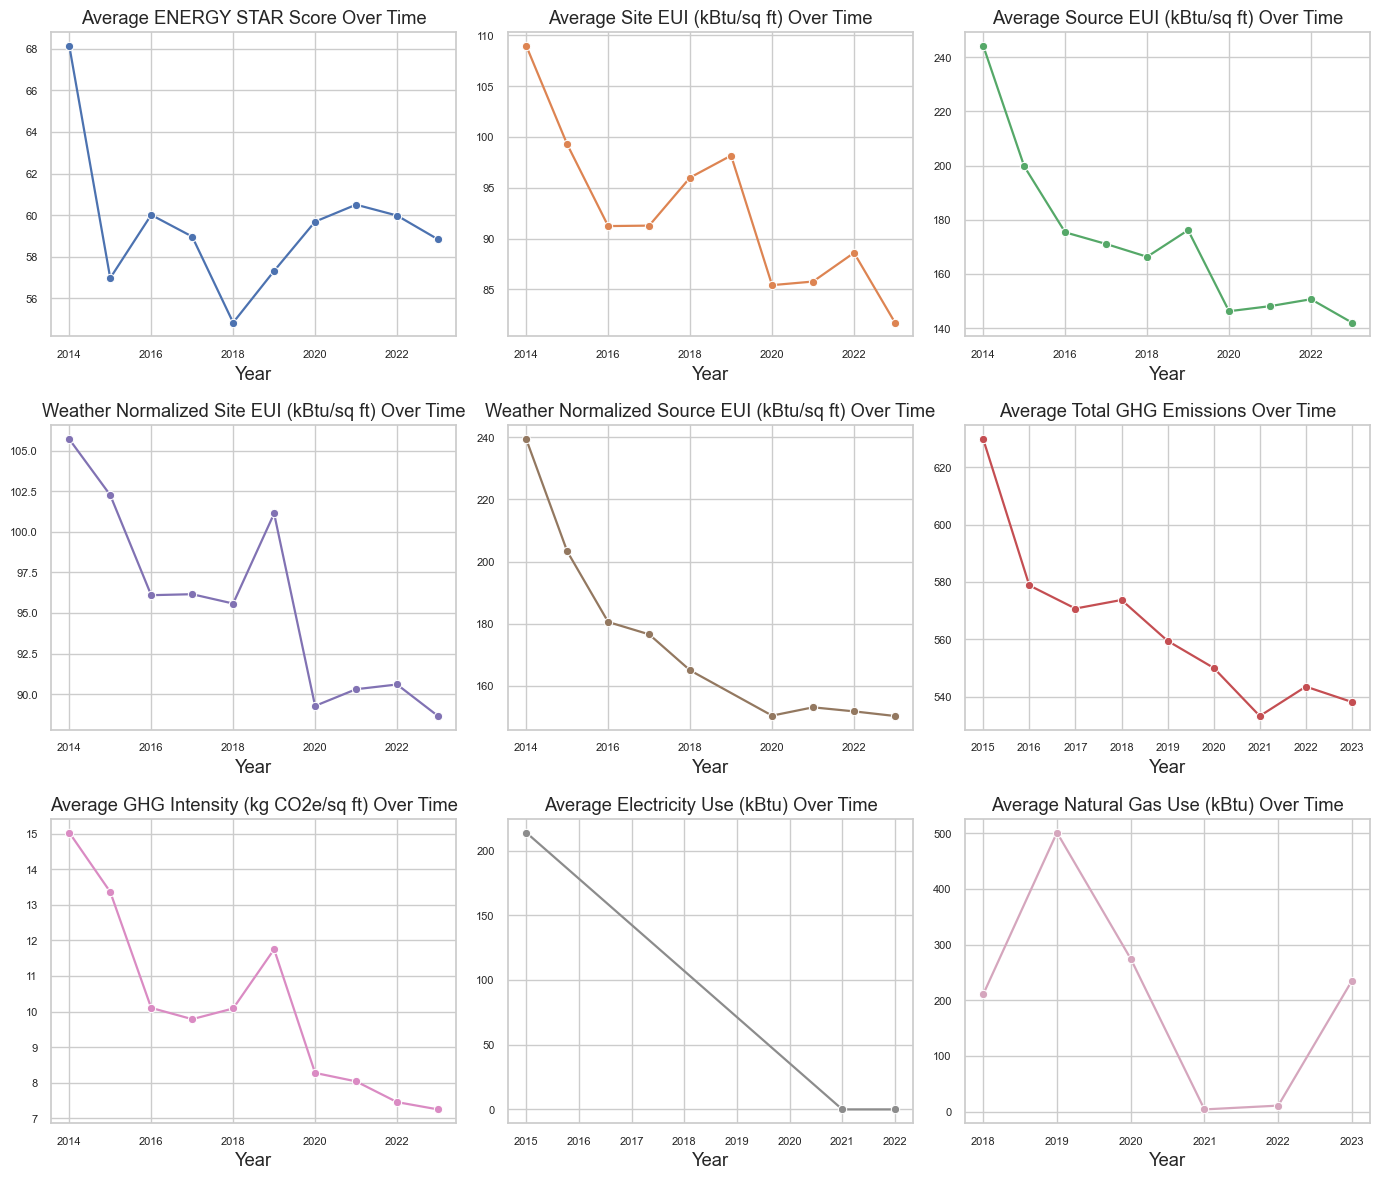

In [ ]:
cols = [m[0] for m in metrics]
titles = [m[1] for m in metrics]
colors = [m[2] for m in metrics]
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()
for i, col in enumerate(cols):
    if col not in combined_df:
        continue
    combined_df[col] = pd.to_numeric(combined_df[col], errors="coerce")
    yearly = combined_df.groupby("Data Year")[col].mean()
    sns.lineplot(
        x=yearly.index,
        y=yearly.values,
        marker="o",
        linewidth=1.6,
        color=colors[i],
        ax=axes[i],
    )
    axes[i].set(title=titles[i], xlabel="Year", ylabel="")
    axes[i].tick_params(labelsize=8)
    axes[i].grid(True)
for j in range(len(cols), len(axes)):
    axes[j].axis("off")
plt.tight_layout()
plt.savefig("output/yearly_metrics_grid.png", dpi=300, bbox_inches="tight")
plt.show()

### Visualize and create summary statistics for relationships between variables

#### Correlation Summary

In [154]:
features = ["Year Built", "# of Buildings"]
targets = [
    "Site EUI (kBtu/sq ft)",
    "Source EUI (kBtu/sq ft)",
    "Weather Normalized Site EUI (kBtu/sq ft)",
    "Total GHG Emissions (Metric Tons CO2e)",
    "GHG Intensity (kg CO2e/sq ft)",
    "Water Use (kGal)",
    "ENERGY STAR Score",
]
data_na = combined_df[features + targets].dropna()
results = {}

for target in targets:
    X = data_na[features]
    y = data_na[target]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    results[target] = model
    print(f"\n===== OLS for {target} =====")
    print(model.summary().tables[1])


===== OLS for Site EUI (kBtu/sq ft) =====
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            100.1941     68.398      1.465      0.144     -34.388     234.776
Year Built        -0.0052      0.035     -0.149      0.881      -0.074       0.064
# of Buildings   -13.8196      6.510     -2.123      0.035     -26.629      -1.010

===== OLS for Source EUI (kBtu/sq ft) =====
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -260.2295    118.141     -2.203      0.028    -492.686     -27.773
Year Built         0.2112      0.060      3.501      0.001       0.093       0.330
# of Buildings   -18.4533     11.245     -1.641      0.102     -40.579       3.672

===== OLS for Weather Normalized Site EUI (kBtu/sq ft) =====
                    

In [77]:
r2_table = pd.DataFrame(
    {
        "Metric": targets,
        "R-squared": [results[t].rsquared for t in targets],
        "Adj R-squared": [results[t].rsquared_adj for t in targets],
        "Observations": [int(results[t].nobs) for t in targets],
    }
)
print(r2_table)

                          Metric  R-squared  Adj R-squared  Observations
0          Site EUI (kBtu/sq ft)   0.003899       0.003807         21598
1        Source EUI (kBtu/sq ft)   0.022091       0.022001         21598
2  GHG Intensity (kg CO2e/sq ft)   0.021340       0.021249         21598


#### Correlation Visualization


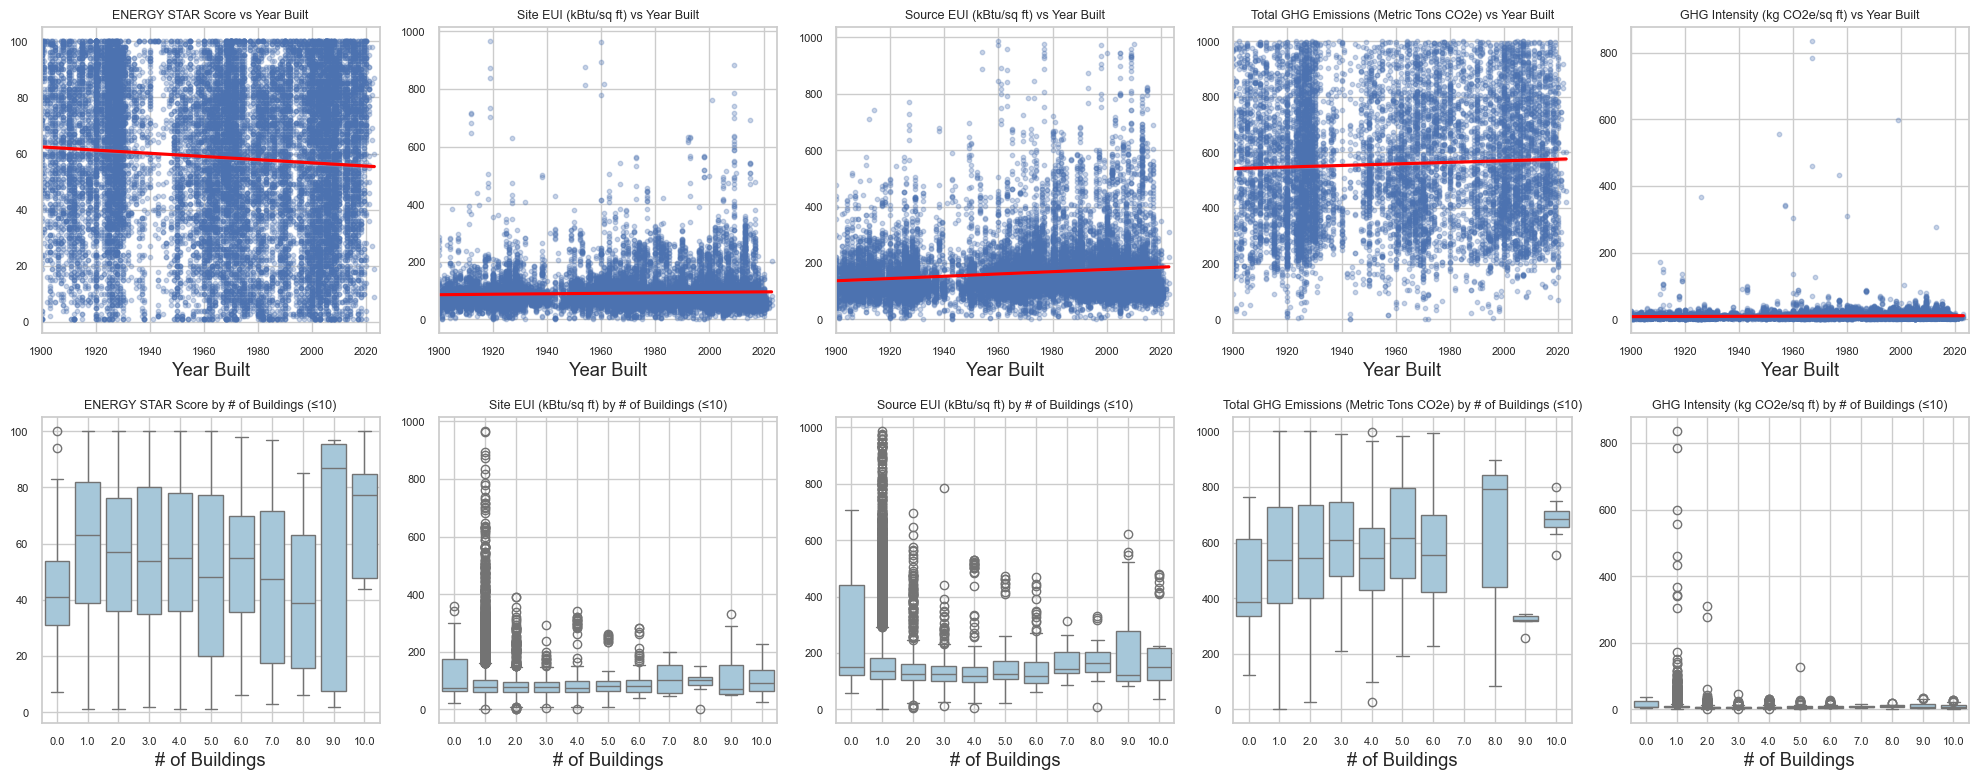

In [ ]:
metrics = [
    "ENERGY STAR Score",
    "Site EUI (kBtu/sq ft)",
    "Source EUI (kBtu/sq ft)",
    "Total GHG Emissions (Metric Tons CO2e)",
    "GHG Intensity (kg CO2e/sq ft)",
]
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, m in enumerate(metrics):
    sns.regplot(
        data=combined_df,
        x="Year Built",
        y=m,
        scatter_kws={"alpha": 0.3, "s": 10},
        line_kws={"color": "red"},
        ax=axes[i],
    )
    axes[i].set_xlim(1900, 2025)
    axes[i].set_title(f"{m} vs Year Built", fontsize=9)
    axes[i].set_xlabel("Year Built")
    axes[i].set_ylabel("")
for i, m in enumerate(metrics, 5):
    sns.boxplot(
        combined_df[combined_df["# of Buildings"] <= MAX_BUILDINGS],
        x="# of Buildings",
        y=m,
        color="#9ecae1",
        ax=axes[i],
    )
    axes[i].set_title(f"{m} by # of Buildings (≤10)", fontsize=9)
    axes[i].set_xlabel("# of Buildings")
    axes[i].set_ylabel("")
for a in axes:
    a.tick_params(labelsize=8)
    a.grid(True)
plt.tight_layout()
plt.savefig("output/metrics_by_year_and_buildings.png", dpi=300, bbox_inches="tight")
plt.show()